In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

from matplotlib import pyplot as plt
from dotenv import load_dotenv
from sklearn import preprocessing, model_selection, linear_model
from sklearn import metrics, dummy

load_dotenv()
sns.color_palette('colorblind')
plt.style.use('Solarize_Light2')

# Setting default DPI, pulling it from dotenv if it exists, setting it on 100 if not

try:
    pc_cores = int(os.getenv('CORES'))

except TypeError:
    pc_cores = 4

try:
    pc_dpi = int(os.getenv('DPI'))

except TypeError:
    pc_dpi = 100

if pc_dpi is None:
    pc_dpi = 100

if pc_dpi >= 155:
    pc_dpi = 155


In [2]:
file_ghg_eui = "./data/seattle_predict_ghg_eui.csv"


In [3]:
df_model = pd.read_csv(file_ghg_eui).astype(float)

df_model.columns


Index(['OSEBuildingID', 'scaled_Electricity(kWh)',
       'scaled_GHGEmissions(MetricTonsCO2e)',
       'scaled_GHGEmissionsIntensity(kgCO2e/ft2)', 'scaled_SourceEUI(kWh/m2)',
       'scaled_SiteEnergyUse(kWh)', 'scaled_SiteEnergyUseWN(kWh)',
       'scaled_NaturalGas(kWh)', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'ENERGYSTARScore', 'ohe_nbhood_BALLARD',
       'ohe_nbhood_CENTRAL', 'ohe_nbhood_DELRIDGE', 'ohe_nbhood_DOWNTOWN',
       'ohe_nbhood_EAST', 'ohe_nbhood_GREATER DUWAMISH',
       'ohe_nbhood_LAKE UNION', 'ohe_nbhood_MAGNOLIA / QUEEN ANNE',
       'ohe_nbhood_NORTH', 'ohe_nbhood_NORTHEAST', 'ohe_nbhood_NORTHWEST',
       'ohe_nbhood_SOUTHEAST', 'ohe_nbhood_SOUTHWEST', 'ohe_ptype_Hospital',
       'ohe_ptype_Hotel', 'ohe_ptype_K-12 School', 'ohe_ptype_Large Office',
       'ohe_ptype_Mixed Use Property', 'ohe_ptype_Office', 'ohe_ptype_Other',
       'ohe_ptype_Refrigerated Warehouse', 'ohe_ptype_Residence Hall',
       'ohe_ptype_Small & Medium medical facil

In [4]:
df_model.head(n=5)

,OSEBuildingID,scaled_Electricity(kWh),scaled_GHGEmissions(MetricTonsCO2e),scaled_GHGEmissionsIntensity(kgCO2e/ft2),scaled_SourceEUI(kWh/m2),scaled_SiteEnergyUse(kWh),scaled_SiteEnergyUseWN(kWh),scaled_NaturalGas(kWh),YearBuilt,NumberofBuildings,...,ohe_ptype_Mixed Use Property,ohe_ptype_Office,ohe_ptype_Other,ohe_ptype_Refrigerated Warehouse,ohe_ptype_Residence Hall,ohe_ptype_Small & Medium medical facility,ohe_ptype_Small & Mid-Sized Office,ohe_ptype_Supermarket & Grocery store,ohe_ptype_Warehouse,ohe_ptype_Worship Facility
0,1.0,0.963847,2.331658,1.770173,1.012887,1.871456,1.841703,0.500705,1927.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.615322,2.897230,1.799564,0.913481,2.364731,2.335691,4.178122,1996.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.380423,2.780985,3.572830,1.536320,1.688096,1.633029,1.009034,1926.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,0.401384,1.421417,1.074583,0.455283,1.248236,1.271392,2.089235,1926.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,-0.326328,3.296262,3.945117,0.564008,1.603790,1.392459,2.706276,1928.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_model.set_index("OSEBuildingID", inplace=True)


In [6]:
df_model.dropna(inplace=True)


In [7]:
ohe_cols = [col for col in df_model.columns if col.startswith("ohe")]

df_plot_features = df_model.drop(columns=ohe_cols)


In [8]:
df_train, df_test = model_selection.train_test_split(df_model, test_size=0.30)


In [9]:
# Target_1 : GHGEmissionsIntensity(kgCO2e/ft2)

X_train = df_train.drop(columns="scaled_GHGEmissionsIntensity(kgCO2e/ft2)").to_numpy()
X_test = df_test.drop(columns="scaled_GHGEmissionsIntensity(kgCO2e/ft2)").to_numpy()

y_train = df_train[["scaled_GHGEmissionsIntensity(kgCO2e/ft2)"]].to_numpy()
y_test = df_test[["scaled_GHGEmissionsIntensity(kgCO2e/ft2)"]].to_numpy()


In [10]:
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X=X_test)


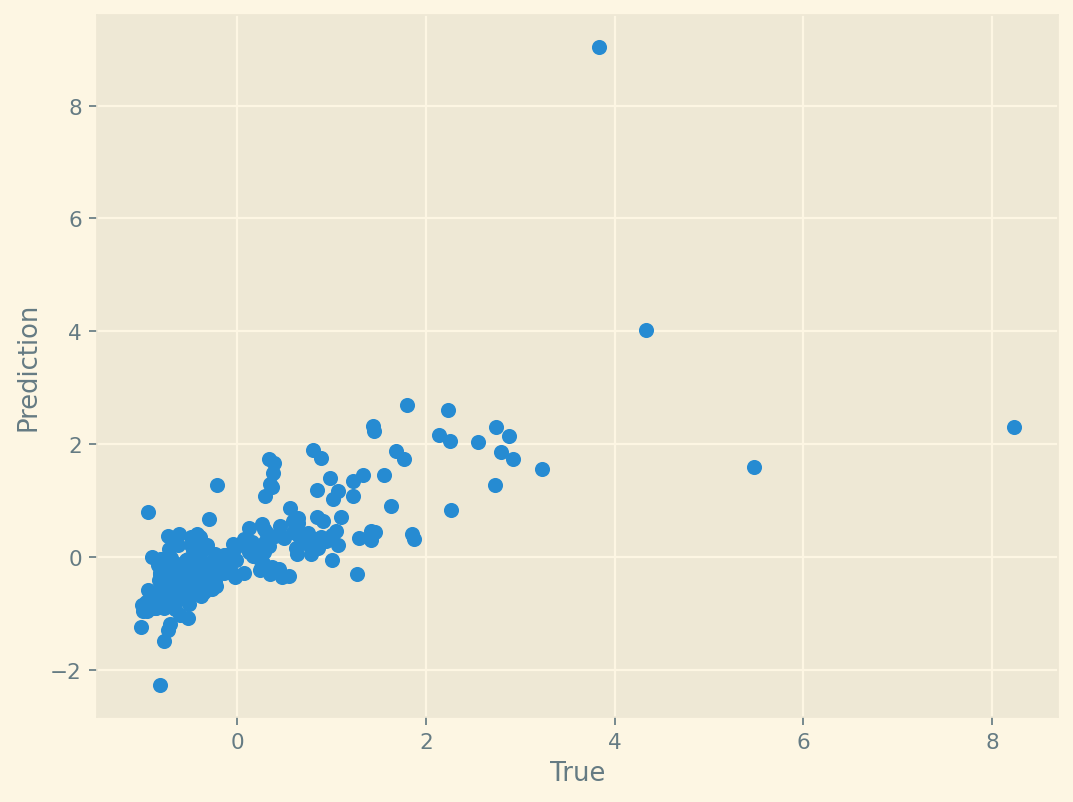

In [11]:
fig, (ax1) = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(8, 6),
    dpi=pc_dpi,
)

ax1.scatter(y_test, y_pred)

###
# Titles/Lables
ax1.set_xlabel("True")
ax1.set_ylabel("Prediction")
#
###

plt.show()


In [12]:
rse = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

rmse = np.sqrt(rse)

print(f"RMSE = {rmse}")

r_two = metrics.r2_score(y_true=y_test, y_pred=y_pred)

print(f"R2 Score = {r_two}")

## Regression par une droite non concluante --> regression polynomiale


RMSE = 0.7622913149437825
R2 Score = 0.5501292945796384


In [13]:
df_train.head()

,scaled_Electricity(kWh),scaled_GHGEmissions(MetricTonsCO2e),scaled_GHGEmissionsIntensity(kgCO2e/ft2),scaled_SourceEUI(kWh/m2),scaled_SiteEnergyUse(kWh),scaled_SiteEnergyUseWN(kWh),scaled_NaturalGas(kWh),YearBuilt,NumberofBuildings,NumberofFloors,...,ohe_ptype_Mixed Use Property,ohe_ptype_Office,ohe_ptype_Other,ohe_ptype_Refrigerated Warehouse,ohe_ptype_Residence Hall,ohe_ptype_Small & Medium medical facility,ohe_ptype_Small & Mid-Sized Office,ohe_ptype_Supermarket & Grocery store,ohe_ptype_Warehouse,ohe_ptype_Worship Facility
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
23918.0,-0.333534,-0.635747,-0.679089,0.587306,-0.633159,-0.676364,-0.712658,1963.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24359.0,0.041944,-0.232648,-0.434163,0.388495,-0.092245,-0.080949,-0.221974,1984.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20967.0,-0.757138,0.110172,1.064786,-0.507709,-0.464621,-0.421502,0.477014,1925.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20861.0,-0.639605,-0.262973,0.829656,0.323260,-0.619160,-0.624728,-0.094320,1988.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21601.0,-0.238403,-0.125278,-0.345989,-0.678563,-0.231254,-0.203421,0.004528,2000.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
scores_regression = model_selection.cross_val_score(
        lin_reg,
        X=X_train,
        y=y_train,
        scoring='r2',
        cv=50,
        n_jobs=-1,
    )

mean_r2_regression = scores_regression.mean()

print(f"Mean r2 score on 20 cv for linear regression = {mean_r2_regression}")


Mean r2 score on 20 cv for linear regression = 0.557624280265171


In [15]:
y_pred_basic = lin_reg.predict(X_test)

rse_basic = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_basic)
rmse_basic = np.sqrt(rse_basic)

r2_basic = metrics.r2_score(y_true=y_test, y_pred=y_pred_basic)

mae_basic = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_basic)

print(f"""Metrics : \n######################
RMSE: {rmse_basic}\nr2_score : {r2_basic} \nMAE : {mae_basic}""")


Metrics : 
######################
RMSE: 0.7622913149437825
r2_score : 0.5501292945796384 
MAE : 0.4456266063348878


In [16]:
# Dummy 

dummy_reg_ghg = dummy.DummyRegressor()

scores_dummy = model_selection.cross_val_score(
        dummy_reg_ghg,
        X=X_train,
        y=y_train,
        scoring='r2',
        cv=50,
        n_jobs=-1,
    )

dummy_reg_ghg.fit(
    X=X_train,
    y=y_train
)


DummyRegressor()

In [17]:
y_pred_dummy = dummy_reg_ghg.predict(X_test)

rse_dummy = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_dummy)
rmse_dummy = np.sqrt(rse_dummy)

r2_dummy = metrics.r2_score(y_true=y_test, y_pred=y_pred_dummy)

mae_dummy = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_dummy)

print(f"""Metrics : \n######################
RMSE: {rmse_dummy}\nr2_score : {r2_dummy} \nMAE : {mae_dummy}""")


Metrics : 
######################
RMSE: 1.139836046351375
r2_score : -0.005843802697245382 
MAE : 0.783679976880995


In [18]:
# # Ridge

# ridge = linear_model.Ridge()

# n_alphas = 200
# alphas = np.logspace(-5, 5, n_alphas)
# parameter = {"alpha": alphas}
# clf_ridge_ghg = model_selection.GridSearchCV(
#     estimator=ridge,
#     param_grid=parameter,
#     scoring="r2",
#     cv=50,
#     n_jobs=-1
# )

# clf_ridge_ghg.fit(
#         X=X_train,
#         y=y_train
#     )

# print("done .. ")


In [19]:
# best_alpha_ridge_ghg = clf_ridge_ghg.best_params_["alpha"]

# print("Best alpha for ridge = ", best_alpha_ridge_ghg)


In [20]:
# y_pred_ridge_ghg = clf_ridge_ghg.predict(X_test)

# rse_ridge_ghg = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_ridge_ghg)
# rmse_ridge_ghg = np.sqrt(rse_ridge_ghg)

# r2_ridge_ghg = metrics.r2_score(y_true=y_test, y_pred=y_pred_ridge_ghg)

# mae_ridge_ghg = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_ridge_ghg)

# print(f"""Metrics : \n######################
# RMSE: {rmse_ridge_ghg}\nr2_score : {r2_ridge_ghg} \nMAE : {mae_ridge_ghg}""")


In [21]:
# # Lasso

# lasso = linear_model.Lasso()
# parameter["alpha"] = np.arange(0.01, 10, 0.01)

# clf_lasso_ghg = model_selection.GridSearchCV(
#     estimator=lasso,
#     scoring="r2",
#     param_grid=parameter,
#     cv=50,
#     n_jobs=-1
# )

# clf_lasso_ghg.fit(
#         X=X_train,
#         y=y_train
#     )

# print("done .. ")


In [22]:
# best_alpha_lasso_ghg = clf_lasso_ghg.best_params_["alpha"]

# print("Best alpha for lasso = ", best_alpha_lasso_ghg)


In [23]:
# y_pred_lasso_ghg = clf_lasso_ghg.predict(X_test)

# rse_lasso_ghg = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_lasso_ghg)
# rmse_lasso_ghg = np.sqrt(rse_lasso_ghg)

# r2_lasso_ghg = metrics.r2_score(y_true=y_test,y_pred=y_pred_lasso_ghg)

# mae_lasso_ghg = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_lasso_ghg)

# print(f"""Metrics : \n######################
# RMSE: {rmse_lasso_ghg}\nr2_score : {r2_lasso_ghg} \nMAE : {mae_lasso_ghg}""")


In [24]:
# l1_range = np.arange(0.01, 0.99, 0.05)

# clf_elastic_net = linear_model.ElasticNetCV(
#     l1_ratio=l1_range,
#     n_alphas=200,
#     cv=50,
#     n_jobs=-1,
# )

# clf_elastic_net.fit(
#     X=X_train,
#     y=y_train
# )

# print("done .. ")


In [25]:
# print(clf_elastic_net.l1_ratio_)
# print(clf_elastic_net.alpha_)


In [26]:
# y_pred_enet_ghg = clf_elastic_net.predict(X_test)

# rse_enet_ghg = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_enet_ghg)
# rmse_enet_ghg = np.sqrt(rse_enet_ghg)

# r2_enet_ghg = metrics.r2_score(y_true=y_test,y_pred=y_pred_enet_ghg)

# mae_enet_ghg = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_enet_ghg)

# print(f"""Metrics : \n######################
# RMSE: {rmse_enet_ghg}\nr2_score : {r2_enet_ghg} \nMAE : {mae_enet_ghg}""")


In [27]:
# y_pred_lasso_ghg

# print((((y_pred_lasso_ghg) - y_test) ** 2).sum())

Classes test : Heresy : imports not in 1st cell

In [28]:
from scripts.models.regressions import Regressions

In [29]:
ghg_target = "scaled_GHGEmissionsIntensity(kgCO2e/ft2)"
ghg_regression = Regressions(dataframe=df_model, target_col=ghg_target)


In [30]:
ghg_regression.display_all_metrics()

Step : Elastic Net


/Users/psemp/Documents/GitHub/ds_p4/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Step : Lasso
Step : Ridge
Step : standard regression

###############

Standard :
 - rss  =  94.98823824112002
 - r2_score  =  0.547537139705281
 - rsme  =  0.6032740754576097
 - mae  =  0.42876709006821173

###############

Ridge :
 - Ridge best alpha = 60.80224261649427
 - rss  =  75.69988842216186
 - r2_score  =  0.6394144298945934
 - rsme  =  0.5385516564592014
 - mae  =  0.3897062477056286

###############

LASSO : 
 - Best LASSO alpha : 0.04
 - rss  =  91737.77945611606
 - r2_score  =  0.6247076301234409
 - rsme  =  0.5494245508707436
 - mae  =  0.40303633013143225

###############

Elastic Net :
 - Elastic net best l1 ratio = 0.060000000000000005
 - Elastic net best alpha = 0.15701656338922565
 - rss  =  88726.62652984119
 - r2_score  =  0.6276196912905991
 - rsme  =  0.547288784432645
 - mae  =  0.40146317053484865


In [31]:
ghg_regression.df_predictions

,True,Elastic_Net,lasso,ridge,basic_regression
0,-0.649698,-0.175198,-0.199238,-0.193209,-0.154722
1,0.604324,0.277418,0.293061,0.291021,0.099293
2,-0.414569,-0.329365,-0.303121,-0.382251,-0.385551
3,-0.600713,-0.079541,-0.085281,-0.063740,-0.182552
4,-0.777059,-0.299239,-0.305384,-0.324986,-0.382944
...,...,...,...,...,...
256,-0.786856,-0.536197,-0.519686,-0.537731,-0.506960
257,0.565136,0.415710,0.439486,0.413905,0.256175
258,-0.512539,-0.441776,-0.425168,-0.450528,-0.482456
259,1.446870,2.275640,2.417681,2.294375,2.292313


In [32]:
target_eui = "scaled_SourceEUI(kWh/m2)"
eui_regression = Regressions(dataframe=df_model, target_col=target_eui)


In [33]:
eui_regression.display_all_metrics()

Step : Elastic Net


/Users/psemp/Documents/GitHub/ds_p4/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Step : Lasso
Step : Ridge
Step : standard regression

###############

Standard :
 - rss  =  63.91873148685959
 - r2_score  =  0.7225026928400151
 - rsme  =  0.49487306893362454
 - mae  =  0.36739214926317115

###############

Ridge :
 - Ridge best alpha = 42.97004704320844
 - rss  =  68.63489419424874
 - r2_score  =  0.7020279052310358
 - rsme  =  0.5128049758660534
 - mae  =  0.3716749389503376

###############

LASSO : 
 - Best LASSO alpha : 0.02
 - rss  =  103477.60711760505
 - r2_score  =  0.6938533002139358
 - rsme  =  0.5197915613985767
 - mae  =  0.3735426788221049

###############

Elastic Net :
 - Elastic net best l1 ratio = 0.9600000000000001
 - Elastic net best alpha = 0.01675970877825124
 - rss  =  104750.28575007599
 - r2_score  =  0.7032542564749266
 - rsme  =  0.5117486228907167
 - mae  =  0.36793335940837
